In [260]:
import pandas as pd
import seaborn as sn
import warnings
from collections import Counter

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore')

SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 22
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

%matplotlib inline

In [451]:
# 预定义一些数据处理的函数，方便之后调用
def get_content(title):
    if '.' in title:
        return title.split('.')[1].strip()
    return title.strip()

def location(l):
    return l[-3:-1]

def grade():
    file = pd.read_excel('grade.xlsx',header=None)
    return {str(file.iloc[i][0]):file.iloc[i][1] for i in range(file.shape[0])}

def facultyMap():
    file = pd.read_excel('faculty.xlsx',header=None)
    return {file.iloc[i][0]:file.iloc[i][1] for i in range(file.shape[0])}

def attitudeClassify():
    file = pd.read_excel('attitude.xlsx',header=None)
    return {file.iloc[i][0]:file.iloc[i][1] for i in range(file.shape[0])}

def userComment(answer):
    if '〖' in answer:
        return answer.split('〖')[1].strip('〗')
    return ''

def toNumber9(answer):
    AnswerSet = list(record[9].unique())
    result = {i:AnswerSet.index(i) for i in AnswerSet}
    if result[answer]>2:
        return 2
    return result[answer]

def Answer9():
    return {'骚扰一方有目的的行为': 0, '骚扰一方有目的且令被骚扰\n一方感到不适的行为': 1, '令被骚扰一方感到不适': 2}

def plot_pie(column1=8,column=12):
    pass

#def plot_


def Answer12_14():
    return {1:'完全不会',2:'基本上不会',3:'依严重程度而定',4:'很可能会',5:'一定会'}

In [410]:
#带入原始数据并清理
record = pd.read_excel('29552368_0_性骚扰中的性别差异问题_426_425.xls')
questions = {i: get_content(record.columns[i]) for i in range(1,16)}
record.columns =['序号'] + list(range(1,16))
record.set_index('序号',inplace=True)
rawRecord = record.copy()
record[6] = record[6].apply(lambda x:grade()[x])
record[7] = record[7].apply(lambda x:facultyMap()[x])
record[5] = record[5].apply(location)
record[2] = record[2].apply(timeuse)
record[16] = record[12].apply(userComment)
record[17] = record[13].apply(userComment)
record[18] = record[14].apply(userComment)
record[12] = record[12].apply(lambda x:int(x[0]))
record[13] = record[13].apply(lambda x:int(x[0]))
record[14] = record[14].apply(lambda x:int(x[0]))
record[9] = record[9].apply(toNumber9)
record.drop([1,2,3,4],axis=1,inplace=True)
#record.columns = [questions[i] for i in record.columns]
#record.head()
GenderDif12_14 = pd.DataFrame(index=['陌生同性（总计）','熟识同性（总计）','异性（总计）','陌生同性（男性）','熟识同性（男性）','异性（男性）',
                             '陌生同性（女性）','熟识同性（女性）','异性（女性）'],columns=Answer12_14().values())
c = []
c.append(Counter(record[12]))
c.append(Counter(record[13]))
c.append(Counter(record[14]))
c.append(Counter(record[record[8]=='男'][12]))
c.append(Counter(record[record[8]=='男'][13]))
c.append(Counter(record[record[8]=='男'][14]))
c.append(Counter(record[record[8]=='男'][12]))
c.append(Counter(record[record[8]=='女'][13]))
c.append(Counter(record[record[8]=='女'][14]))

for i in range(1,6):
    GenderDif12_14[Answer12_14()[i]] = [subset[i] for subset in c]

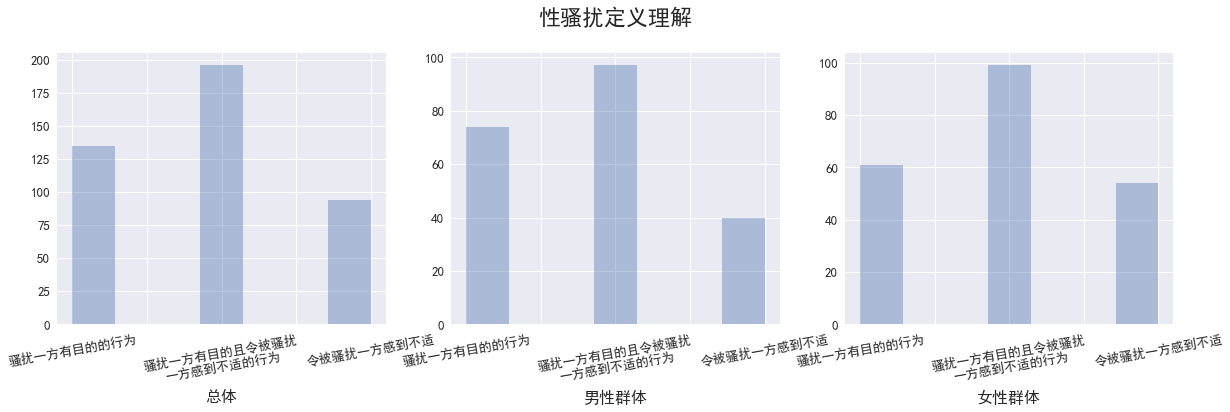

In [462]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
axs[1].set_title('性骚扰定义理解\n')
sn.distplot(record[9],bins=7, hist = True, kde = False,rug=False,norm_hist=False,ax=axs[0],axlabel='总体')
sn.distplot(record[record[8]=='男'][9], bins=7, hist = True, kde = False,rug=False,norm_hist=False,ax=axs[1],axlabel='男性群体')
sn.distplot(record[record[8]=='女'][9], bins=7, hist = True, kde = False,rug=False,norm_hist=False,ax=axs[2],axlabel='女性群体')
for i in range(3):
    t = list(Answer9())
    axs[i].set_xticklabels(['',t[0],'',t[1],'',t[2]],rotation='10') 

如上图所示，大多数人认为性骚扰是骚扰一方有目的且令被骚扰一方感到不适的行为的,男女之间未有明显差异的，但是似乎男性群体更注意骚扰一方有目的的行为，女性群体选取令骚扰一方感到不适的选项相对而言更为多些。

## 熟识程度影响情况

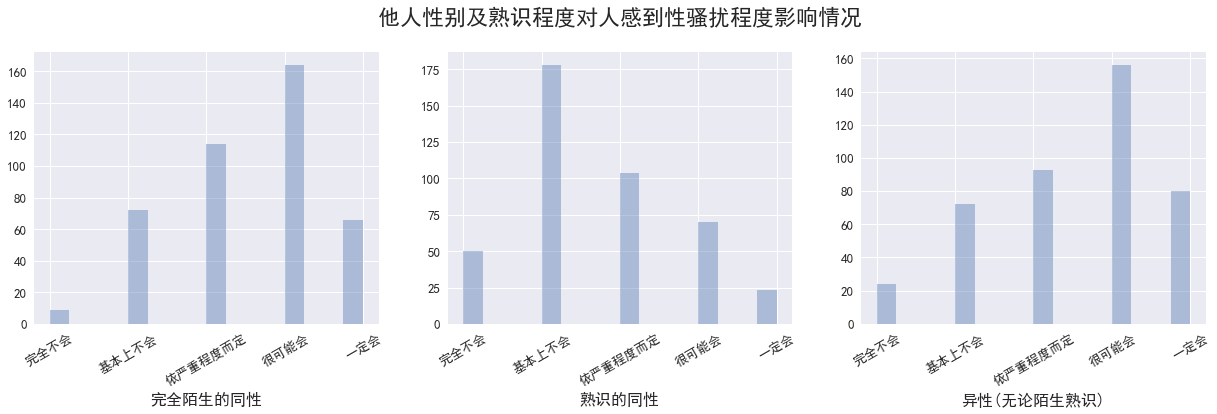

In [464]:
fig, axs = plt.subplots(ncols=3,figsize=(21,5))
axs[1].set_title('他人性别及熟识程度对人感到性骚扰程度影响情况\n')
sn.distplot(record[12], hist = True, kde = False,rug=False,norm_hist=False,ax=axs[0],axlabel='完全陌生的同性')
sn.distplot(record[13], hist = True, kde = False,rug=False,norm_hist=False,ax=axs[1],axlabel='熟识的同性')
sn.distplot(record[14], hist = True, kde = False,rug=False,norm_hist=False,ax=axs[2],axlabel='异性(无论陌生熟识)')
for i in range(3):
    axs[i].set_xticklabels([0]+[Answer12_14()[j] for j in range(1,6)],rotation='30') 

由上图可以明显看出，熟识程度对于大家对性骚扰的认知是有明显影响的，大部分人可能更认为只是同性好友之间的亲密身体接触只打闹。

##  男女性别差异情况分析

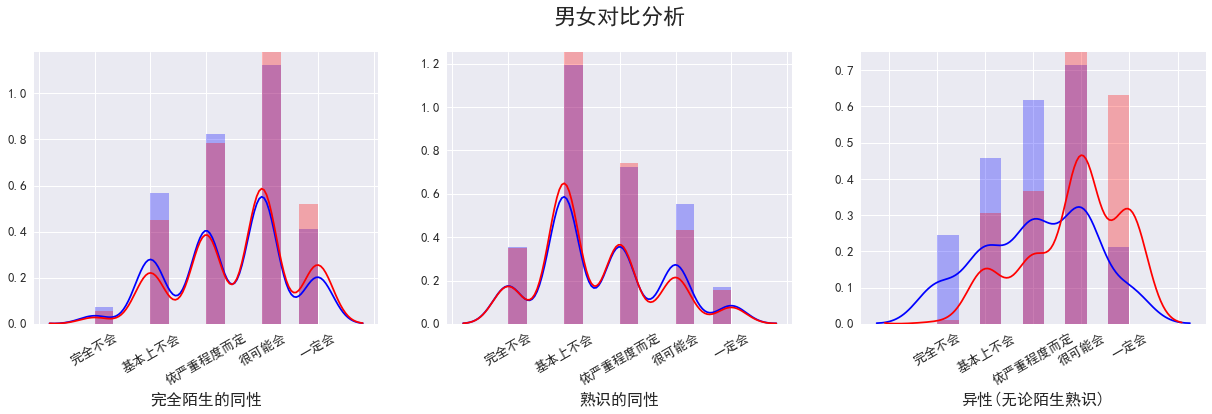

In [350]:
fig, axs = plt.subplots(ncols=3,figsize=(21,5))
axs[1].set_title('男女对比分析\n')
sn.distplot(record[record[8]=='男'][12], hist = True, color='b', hist_kws={"alpha": 0.3},kde = True,rug=False,norm_hist=False,ax=axs[0],axlabel='完全陌生的同性')
sn.distplot(record[record[8]=='女'][12], hist = True, color='r',hist_kws={"alpha": 0.3},kde = True,rug=False,norm_hist=False,ax=axs[0],axlabel='完全陌生的同性')
sn.distplot(record[record[8]=='男'][13], hist = True, color='b', hist_kws={"alpha": 0.3},kde = True,rug=False,norm_hist=False,ax=axs[1],axlabel='熟识的同性')
sn.distplot(record[record[8]=='女'][13], hist = True, color='r',hist_kws={"alpha": 0.3},kde = True,rug=False,norm_hist=False,ax=axs[1],axlabel='熟识的同性')
sn.distplot(record[record[8]=='男'][14], bins=9, hist = True, color='b', hist_kws={"alpha": 0.3},kde = True,rug=False,norm_hist=False,ax=axs[2],axlabel='异性(无论陌生熟识)')
sn.distplot(record[record[8]=='女'][14], bins=9, hist = True, color='r',hist_kws={"alpha": 0.3},kde = True,rug=False,norm_hist=False,ax=axs[2],axlabel='异性(无论陌生熟识)')

#axs[1].set_xticks([0,3,5,6,7])
for i in range(3):
    axs[i].set_xticklabels(["",""]+[Answer12_14()[j] for j in range(1,6)],rotation='30') 

可以看出, 在同性之间，对于性骚扰的态度分布，男女表现并没有很大的差异。而对于异性的态度却截然不同。有些男性觉得未经允许的亲密接触完全不会构成性骚扰，而这一比例在女性中几乎为零。，而非常大比例的女性选择的是很可能会和一定会。

### 具体统计数据详情如下

In [422]:
GenderDif12_14

,完全不会,基本上不会,依严重程度而定,很可能会,一定会
陌生同性（总计）,9,72,114,164,66
熟识同性（总计）,50,178,104,70,23
异性（总计）,24,72,93,156,80
陌生同性（男性）,5,40,58,79,29
熟识同性（男性）,25,84,51,39,12
异性（男性）,23,43,58,67,20
陌生同性（女性）,5,40,58,79,29
熟识同性（女性）,25,94,53,31,11
异性（女性）,1,29,35,89,60


## 男女生倾向相关性分析

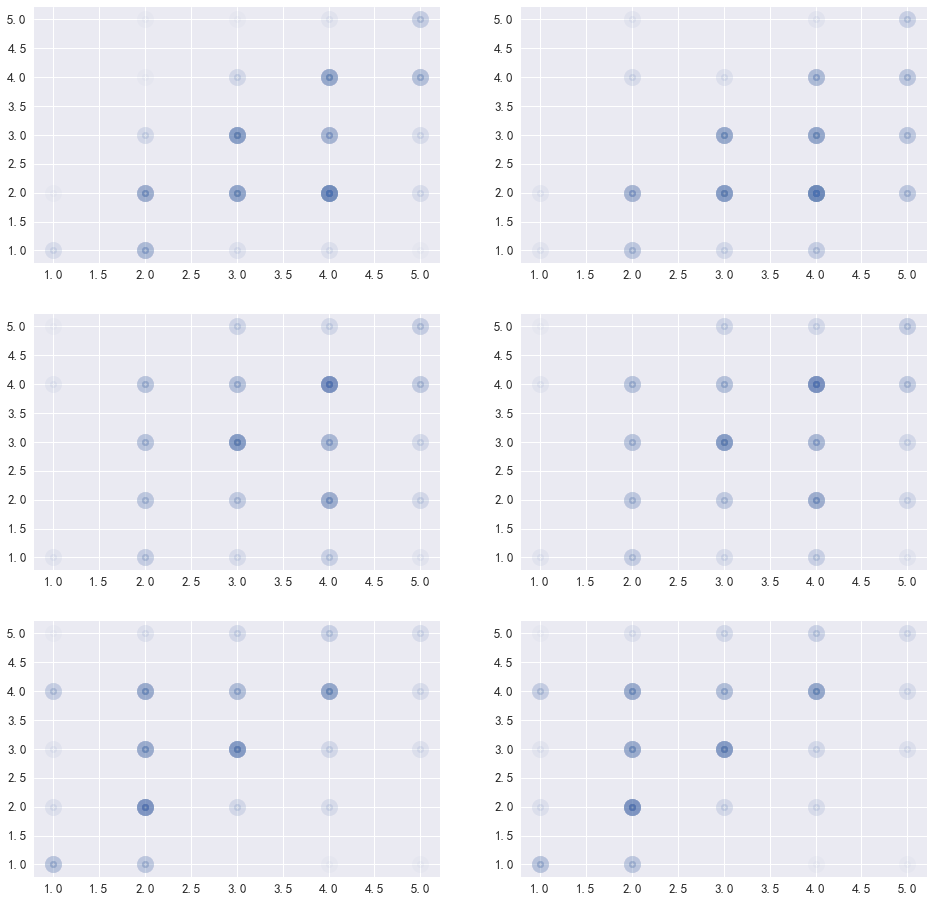

In [588]:
x, y = record[record[8]=='男'],record[record[8]=='女']
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(16,16))
#Cx = Counter(x)
axs[0][0].scatter(x[12],x[13],marker='o',linewidths=10, alpha= 0.03)
axs[0][1].scatter(y[12],y[13],marker='o',linewidths=10, alpha= 0.03)
axs[1][0].scatter(x[12],x[14],marker='o',linewidths=10, alpha= 0.03)
axs[1][1].scatter(x[12],x[14],marker='o',linewidths=10, alpha= 0.03)
axs[2][0].scatter(x[13],x[14],marker='o',linewidths=10, alpha= 0.03)
axs[2][1].scatter(x[13],x[14],marker='o',linewidths=10, alpha= 0.03)

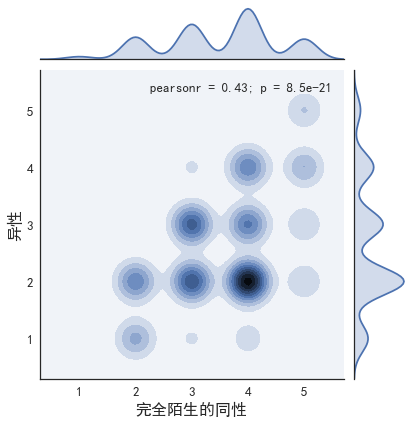

In [562]:
x, y = record[12],record[13]
with sn.axes_style("white"):
    sn.jointplot(x=x, y=y, kind="kde").set_axis_labels("完全陌生的同性", "熟识的同性");

没什么非常明显的相关。密度最大的（4，2）点是（完全陌生同性很可能觉得性骚扰，熟识的同性基本不会觉得性骚扰）

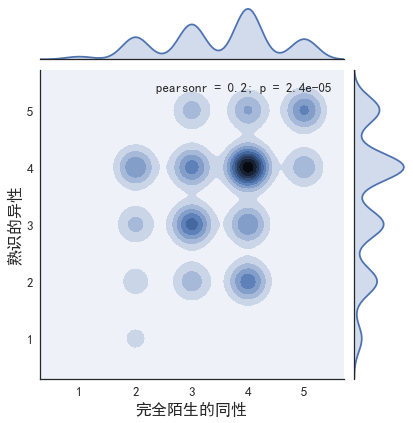

In [564]:
x, y = record[12],record[14]
with sn.axes_style("white"):
    sn.jointplot(x=x, y=y, kind="kde").set_axis_labels("完全陌生的同性", "异性");

In [ ]:
都比较negative,最浓的点是意味着都很可能觉得是性骚扰。

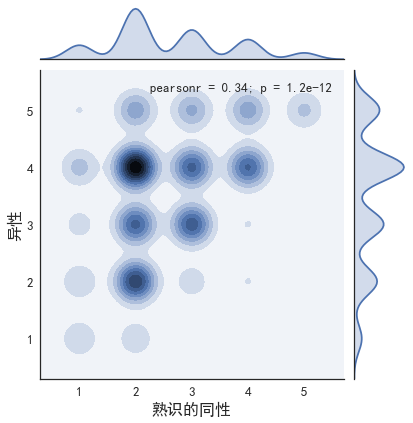

In [567]:
x, y = record[13],record[14]
with sn.axes_style("white"):
    sn.jointplot(x=x, y=y, kind="kde").set_axis_labels("熟识的同性", "异性");